# Is Fandango Still Inflating Ratings ?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). 

He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) , and he found that there's a significant discrepancy between the number of stars displyed to users and the actual rating, which he was able to find in the HTML page. In particular he found:

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded to 4.5 stars, not to 4 stars as you may expect.
* In the 8% of the cases analyzing, the rounding up was done to the next whole star. For instance, a 4.5 ratings would be rounded off to 5 stars.
* For one movie rating, the actual rating of 4 stars in the HTML of the page was changed in 5 stars.

Fandango's officials replied that the biased rounding off was not volunteer but it was caused by a bug in their system, and they promise to fix the bug as soon as possible. Anyway the actual rating value doesn't seem to be diplayed anymore in the HTML of the pages.

In this project, we'll analyze more recent movie ratings data in order to determine whether there has been any change in Fandango's ratings system aftre Hickey's analysis.

## Undestanding the Data

The strategy we'll use to figure out whether there has been any change in Fandango's rating system is to compare it previous and after the analysis. For this purpose we'll work with two samples of movie rating, in one sample the data was collected previous to Hickey's analysis, while the other sample was collected after.

Let's start reading in the two samples and getting familiar with their structure.

In [63]:
import pandas as pd
#Reading the csv files
sample_previous = pd.read_csv("fandango_score_comparison.csv")
sample_after = pd.read_csv("movie_ratings_16_17.csv")

#Exploring the data
sample_previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [64]:
#Exploring the data
sample_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Now we'll isolate the columns that give us information about Fandango's ratings in separate variables. We'll make copies to avoid any SettingWithCopyWarning later on. 

In [65]:
#Isolating the data
fandango_previous = sample_previous[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]].copy()
fandango_after = sample_after[["movie", "year", "fandango"]].copy()

#Exploring the data
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [66]:
#Exploring the data
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal here is to determine whether there has been any change in the Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored in on Fandango's website, regardless of the releasing year.Let's analyze the two data sets.

From the README.md file of the [data set repository](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) of the Hickey's analysis we found:

* The movie must have at least 30 reviews on Fandango's website at the time of sampling (24 August 2015).
* The movie must have ticket on sale in 2015.

From the README.md file of the other [data sample](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) we found:

* The movie must has been released in 2016 or after.
* The movie must have a significant number of votes (unclear how many).

Unfortunately the sampling process were not random, and the resulting samples are very unlikely to be representive of the population we're instered in.

## Changing the Goal of our Analysis

At this point we have two alternatives: either we collect new data, either we change the goal of our analysis adapting it at the data we have. We choose the latter one since it's almost impossible to collect a new sample previous to Hickey's analysis at this moment.

Instead of determine whether there has been any change in Fandango's rating system after Hickey's analysis, we'll trying to understand whether there has been any changes in Fandango's rating system between popular movies in 2015 and popular movies in 2016.

## Isolating the Samples We Need

So, now we have two populations and we want to compare them each other:

* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

The term "popular" is unclear though, we have to define it better. We'll use Hickey's definition of 30 fan ratings and so we'll consider a movie as "popular" if it has 30 fan ratings or more in Fandango's website.

Although one sampling criteria is the number of votes of the movie, the sample after the Hickey's analysis don't provides us any information about the number of votes for each movies. So we choose to sample randomly 10 movies of this sample and then check the number of fan ratings on Fandango website ourselves, looking for information directly on the website. Ideally at least 8 of the 10 movies should have 30 fan ratings or more.  

In [67]:
#Sampling the data set
fandango_after.sample(10, random_state=1) 

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


These are the number of fan ratings we found:

<table style="width:100%">
  <tr>
    <th>Movie</th>
    <th>Fan Ratings</th>
  </tr>
  <tr>
    <td>Mechanic: Resurrection</td>
    <td>2247</td>
  </tr>
  <tr>
    <td>Warcraft</td>
    <td>7271</td>
  </tr>
  <tr>
    <td>Max Steel</td>
    <td>493</td>
  </tr>
  <tr>
    <td>Me Before You</td>
    <td>5263</td>
  </tr>
  <tr>
    <td>Fantastic Beasts and Where to Find Them</td>
    <td>13400</td>
  </tr>
  <tr>
    <td>Cell</td>
    <td>17</td>
  </tr>
  <tr>
    <td>Genius</td>
    <td>127</td>
  </tr>
  <tr>
    <td>Sully</td>
    <td>11877</td>
  </tr>
  <tr>
    <td>A Hologram for the King</td>
    <td>500</td>
  </tr>
  <tr>
    <td>Captain America: Civil War</td>
    <td>35057</td>
  </tr>
</table>

As we can see, 90% of the movies of our sample has 30 fan ratings or more, so now we can proceed in our analysis with a bit more confidence.

Let's check if the data set prior to Hickey's analysis doesn't contains wrong values.

In [68]:
#Checking the data set
wrong_values = fandango_previous[fandango_previous["Fandango_votes"] < 30].shape[0]
print(wrong_values)

0


Now we can confirm that the data set doesn't contain outliers. Our next task is to isolate the movies released in 2015 and in 2016 in two separate data sets in order to perform our analysis. Let's start with the first data set (*fandango_previous*).  

In [69]:
#Viewing the dataset
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [70]:
#Creating the column
fandango_previous["Year"] = fandango_previous["FILM"].str[-5:-1]

#Showing the data set
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [71]:
#Checking the values
fandango_previous["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [72]:
#Creating the new dataframe
fandango_2015 = fandango_previous[fandango_previous["Year"] == "2015"].copy()

#Checking the rows
fandango_2015.shape[0]

129

Now we'll do the same process to the other data set.

In [73]:
#Viewing the dataset
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [74]:
#Checking the values
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [75]:
#Creating the dataframe
fandango_2016 = fandango_after[fandango_after["year"] == 2016].copy()

#Checking the rows
fandango_2016.shape[0]

191

## Comparing Distribution Shapes for 2015 and 2016

We can now start analyzing the two samples we isolated before. Once again, our aim is to determine whether there is any difference between Fandango's rating for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We'll start generating two kernel density plots for the distribution of movie ratings of each data sets.

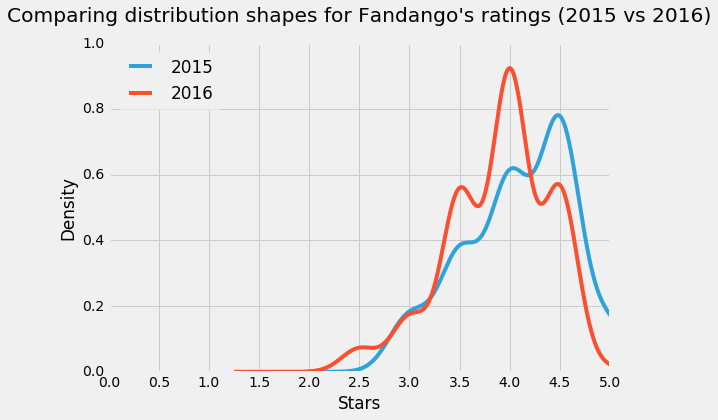

In [80]:
#Importing libraries
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

#Creating the plot
fandango_2015["Fandango_Stars"].plot.kde(label="2015", legend=True, figsize=(8,5.5))
fandango_2016["fandango"].plot.kde(label="2016", legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings (2015 vs 2016)", y=1.05)
plt.xlim(0,5)
plt.xticks(arange(0,5.5,0.5))
plt.xlabel("Stars")
plt.show()

The two kernel density plot are clearly left skewed which means that movies on Fandango have often high or very high fan ratings. The two plots are quite similar but we can note that in 2015 movies there is a peak at 4.5 stars, while in 2016 there is a peak at 4.0 stars. Generally we can say that there is a slightly difference between the two plots and we can also see the direction of the difference: 2016 movies have slightly lower ratings than movies in 2015.

## Comparing Relative Frequencies

We now need to analyze more granular information, we'll examine the frequency tables of the two distributions using percentages.

In [84]:
#Checking the percentages
print("---- 2015 ----")
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()

---- 2015 ----


3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [85]:
#Checking the percentages
print("---- 2016 ----")
fandango_2016["fandango"].value_counts(normalize=True).sort_index()

---- 2016 ----


2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

From the frequency table distributions we can make some considerations: 

* The minimum value in 2015 is 3.0 stars while in 2016 it's 2.5
* In 2015 the 7% of the movies have the maximum value (5.0 stars) while in 2016 only the 0.5% of the movies.
* In 2016 there has been a sharp decrease of movies with 4.5 stars: 24.6% in 2016 vs 38% in 2015.
* In 2016 there has been a sharp increase of movies in the range 3.5/4.0 stars: 64.4% in 2016 vs 46.5% in 2015.

The direction of the change is not so clear anymore.

## Determining the Direction of the Change

The direction of the difference is not as clear as it was on the kernel density plots. We'll take a couple of summary statistics to get a more precise picture about the direction of the difference.

In [101]:
#Computing the mean
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

#Computing the median
median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

#Computing the mode
mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

#Creating the summary dataframe
summary = pd.DataFrame(columns=["2015", "2016"], index=["Mean", "Median", "Mode"])
summary.loc["Mean",:] = [mean_2015, mean_2016]
summary.loc["Median",:] = [median_2015, median_2016]
summary.loc["Mode",:] = [mode_2015, mode_2016]

#Visualizing the dataframe
summary

,2015,2016
Mean,4.08527,3.88743
Median,4,4
Mode,4.5,4


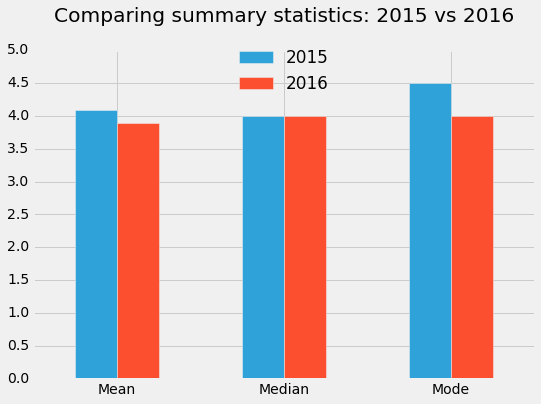

In [124]:
#Creating the plot
summary.plot.bar(rot=0, figsize=(8,5.5))
plt.title("Comparing summary statistics: 2015 vs 2016", y=1.07)
plt.ylim(0,5.0)
plt.yticks(arange(0,5.5,0.5))
plt.legend(framealpha=0, loc="upper center", bbox_to_anchor=(0.5,1.05))
plt.show()

The direction of the change saw on the kernel density plot seems to be confirmed: in 2016 there has been a slightly lower ratings for popular movies than 2015.

## Conclusion

Our analysis showed that there's indeed a slightly change between Fandango's ratings forpopular movie in 2015 and Fandango's ratings for popular movie in 2016. We found as well that average ratings in 2016 are lower than average ratings in 2016.

We can't be completely sure about what has caused the change. Anyway there's a good chance that Fandango have fixed their biased ratings after Hickey's analysis.